## Load Clean Data

In [1]:
import pandas as pd
import numpy as np
import re
from pathlib import Path
from sklearn.model_selection import train_test_split

train_df = pd.read_csv("C:/Projects/04_Fake_News_Detection/data/clean_train.csv")
train_df.head()

,combined_text,label
0,richest man in the world puts trump in his pla...,1
1,dave brat: h-1b does not put americans first r...,0
2,"chinese media alarmed at trump trade adviser, ...",0
3,trump to lay out what he would do in first 100...,0
4,linkedin in russland: kommt die sperre? intern...,1


## Class Distribution

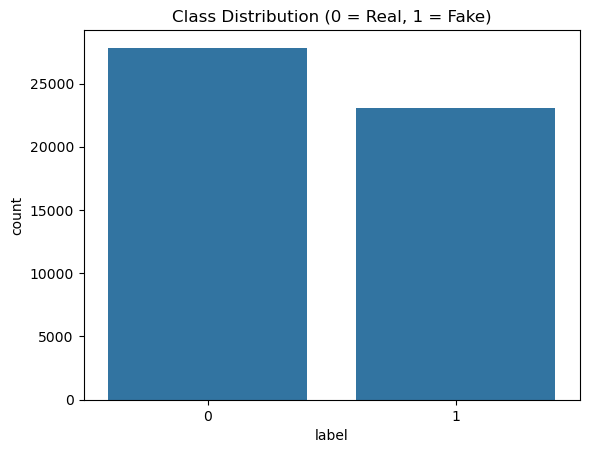

label
0    0.546424
1    0.453576
Name: proportion, dtype: float64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=train_df)
plt.title("Class Distribution (0 = Real, 1 = Fake)")
plt.show()

train_df["label"].value_counts(normalize=True)

The dataset shows a releatively balanced distribution between real and fake news articles (approximately 54% real and 45% fake), which reduces the risk of severe class imbalance bias during model training.

## Text Length Distribution

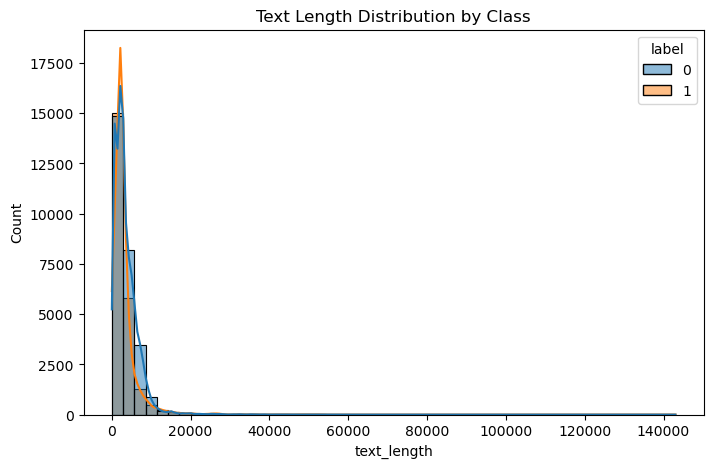

In [5]:
train_df["text_length"] = train_df["combined_text"].str.len()

plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x="text_length", hue="label", bins=50, kde=True)
plt.title("Text Length Distribution by Class")
plt.show()


In [8]:
train_df.groupby("label")["text_length"].mean()

label
0    3552.203263
1    3074.425764
Name: text_length, dtype: float64

Fake articles appear slightly shorter than real articles on average. 
The text length distribution is a strongly right skewed.

## Word Count Distribution

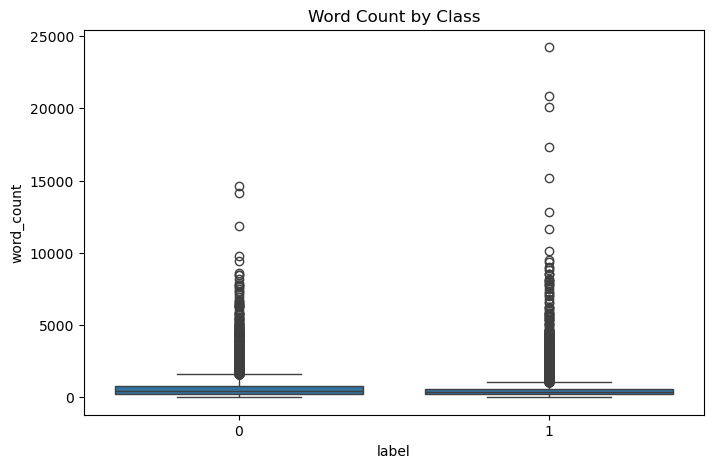

In [6]:
train_df["word_count"] = train_df["combined_text"].str.split().str.len()

plt.figure(figsize=(8,5))
sns.boxplot(x="label", y="word_count", data=train_df)
plt.title("Word Count by Class")
plt.show()


There is no strong difference in typical word count between real and fake articles, though fake articles exhibit slightly more outliers.

## Most Common Words 

In [7]:
from collections import Counter

def get_top_words(text_series, n=20):
    words = " ".join(text_series).split()
    return Counter(words).most_common(n)

real_words = get_top_words(train_df[train_df["label"] == 0]["combined_text"])
fake_words = get_top_words(train_df[train_df["label"] == 1]["combined_text"])

real_words[:20], fake_words[:20]

([('the', 935684),
  ('to', 461666),
  ('of', 412472),
  ('a', 392739),
  ('and', 366603),
  ('in', 343696),
  ('that', 193805),
  ('on', 173495),
  ('for', 155701),
  ('is', 124178),
  ('he', 116215),
  ('with', 107038),
  ('was', 104907),
  ('as', 97145),
  ('said', 97142),
  ('his', 84114),
  ('it', 83563),
  ('by', 81858),
  ('has', 77240),
  ('at', 76175)],
 [('the', 630886),
  ('to', 331609),
  ('of', 292878),
  ('and', 272275),
  ('a', 237125),
  ('in', 198437),
  ('that', 161608),
  ('is', 135997),
  ('for', 106552),
  ('on', 89689),
  ('s', 78894),
  ('it', 77516),
  ('with', 72939),
  ('he', 71329),
  ('as', 69294),
  ('was', 67424),
  ('this', 62525),
  ('trump', 62127),
  ('are', 60167),
  ('be', 58644)])

The most frequent words are common stopwords(the, to, of, a) and they appears in both classes. This indicates that raw word frequency alone is not sufficient to classify real and fake news. More informative features such as TF-IDF representations will be used in the modeling.